# Testing

## Python set-up

In [1]:
# --- imports
import pandas as pd
from numpy import random
import mgplot as mg
import textwrap

In [2]:
# --- check the version number for mgplot
print(mg.__version__)

0.2.7a3


In [3]:
# --- check which functions have been made available
print(textwrap.fill(', '.join(dir(mg)), width=80))

BarKwargs, FinaliseKwargs, GrowthKwargs, LineKwargs, PostcovidKwargs, RunKwargs,
SeriesGrowthKwargs, SummaryKwargs, __all__, __author__, __builtins__,
__cached__, __doc__, __file__, __loader__, __name__, __package__, __path__,
__spec__, __version__, abbreviate_state, axis_utils, bar_plot,
bar_plot_finalise, calc_growth, clear_chart_dir, colorise_list, colors,
contrast, finalise_plot, finalisers, get_color, get_party_palette, get_setting,
growth_plot, growth_plot_finalise, importlib, keyword_checking, line_plot,
line_plot_finalise, multi_column, multi_plot, multi_start, plot_then_finalise,
postcovid_plot, postcovid_plot_finalise, revision_plot, revision_plot_finalise,
run_plot, run_plot_finalise, seastrend_plot, seastrend_plot_finalise,
series_growth_plot, series_growth_plot_finalise, set_chart_dir, set_setting,
settings, state_abbrs, state_names, summary_plot, summary_plot_finalise,
utilities


In [4]:
# --- create a place to save the plots
mg.set_chart_dir("./zz-test-charts")
mg.clear_chart_dir()

## Tests

### Data

In [5]:
# --- data    
index = pd.period_range(start="2010Q1", periods=70, freq="Q")
test_frame = pd.DataFrame(
    {
        "Series 1": [0.1] * len(index),
        "Series 2": [0.1] * len(index),
        "Series 3": [1.01] * len(index),
    },
    index=index,
)
test_frame["Series 1"] = test_frame["Series 1"].cumsum() + random.normal(
    0, 0.1, len(index)
)
test_frame["Series 2"] = test_frame["Series 2"].cumsum()
test_frame["Series 3"] = test_frame["Series 3"].cumprod()
test_frame = test_frame.iloc[4:]


### Growth plot

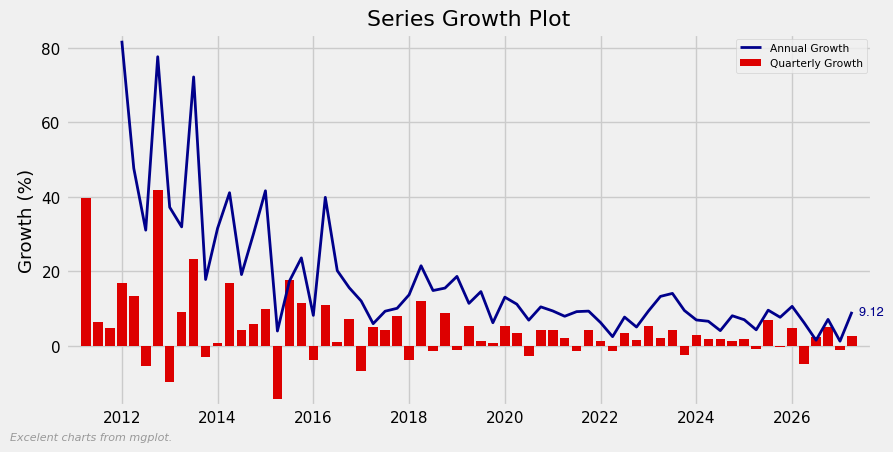

In [6]:
ax = mg.series_growth_plot(test_frame["Series 1"])
mg.finalise_plot(
    ax,
    title="Series Growth Plot",
    lfooter="Excelent charts from mgplot.",
    show=True,
    legend=True,
)

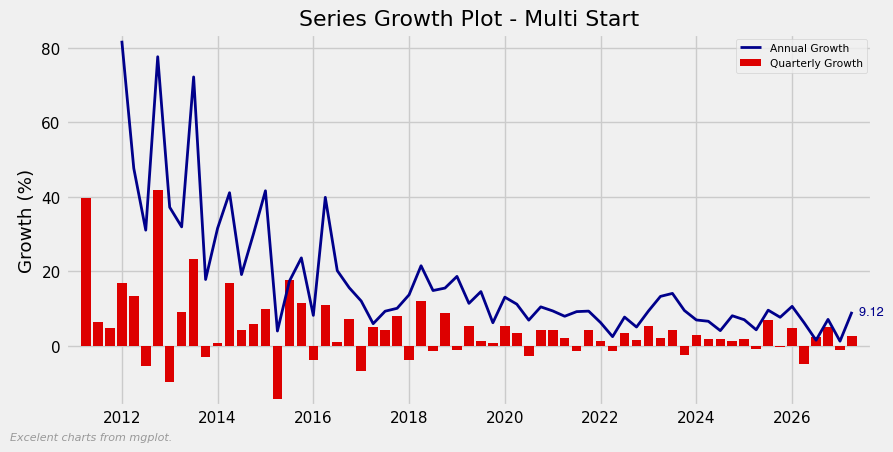

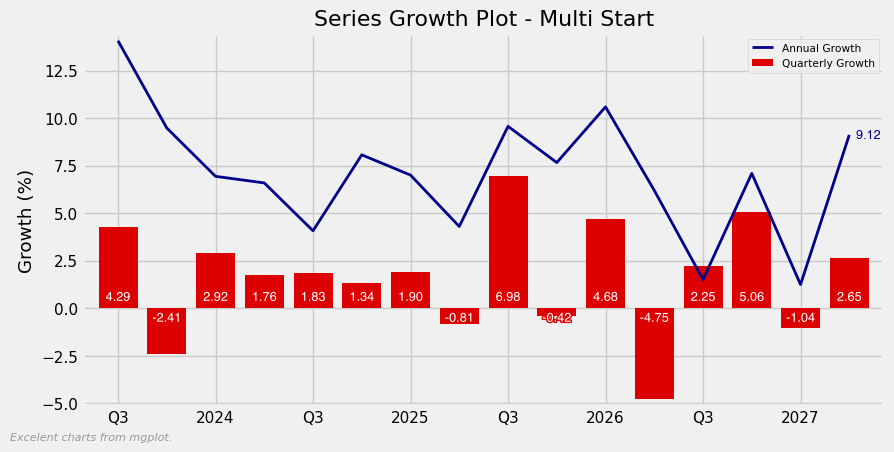

In [7]:
mg.multi_start(
    data=test_frame["Series 1"],
    function=mg.series_growth_plot_finalise,
    starts=[0, -16],
    title="Series Growth Plot - Multi Start",
    lfooter="Excelent charts from mgplot.",
    show=True,
)

### Line plots

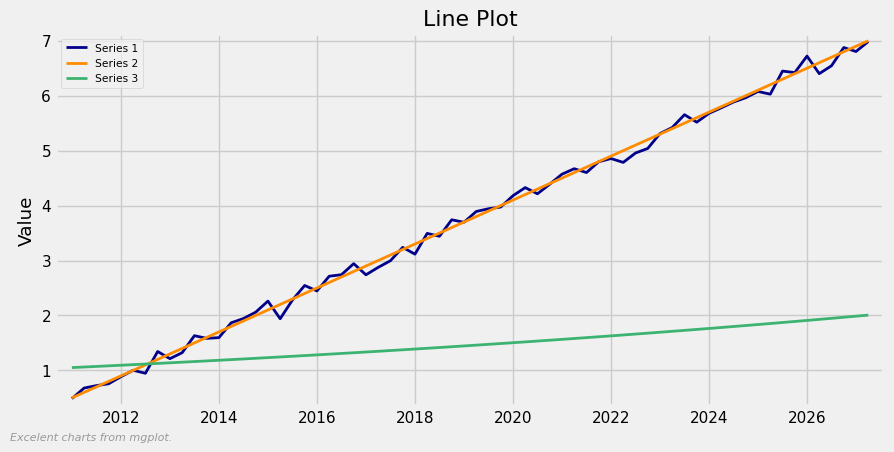

In [8]:
ax = mg.line_plot(test_frame,)
mg.finalise_plot(
    ax, 
    title="Line Plot", 
    ylabel="Value", 
    legend=True,
    lfooter="Excelent charts from mgplot.",
    show=True
)

### Seastrend plot

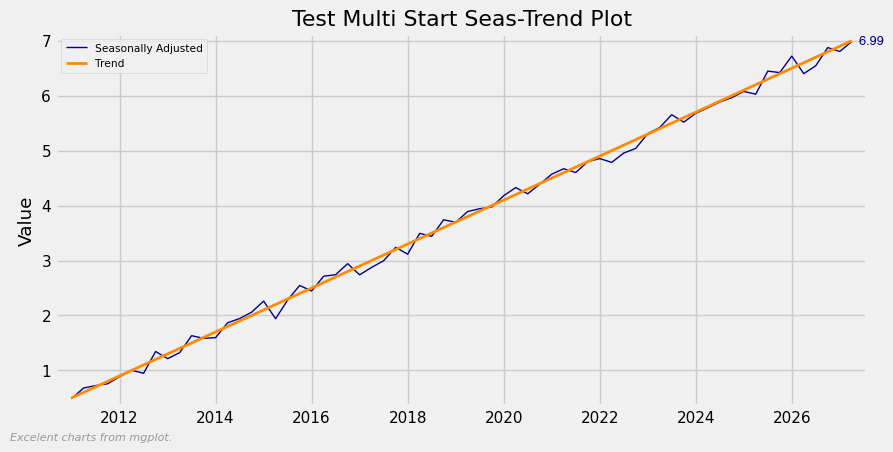

In [9]:
st = test_frame[["Series 1", "Series 2"]].copy()
st.columns = pd.Index(["Seasonally Adjusted", "Trend"])
ax = mg.seastrend_plot(st)
mg.finalise_plot(
    ax,
    title="Test Multi Start Seas-Trend Plot",
    ylabel="Value",
    xlabel=None,
    legend=True,
    lfooter="Excelent charts from mgplot.",
    show=True,
)

### Post-COVID plot

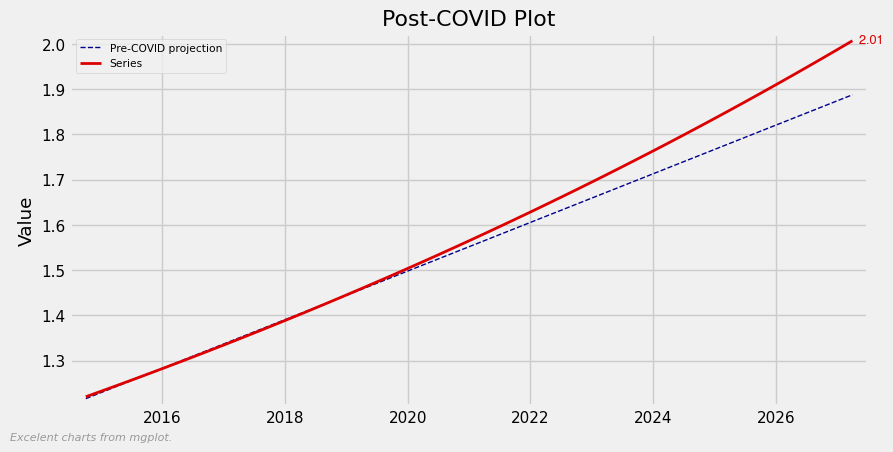

In [10]:
ax = mg.postcovid_plot(test_frame["Series 3"])
mg.finalise_plot(
    ax,
    title="Post-COVID Plot",
    ylabel="Value",
    xlabel=None,
    legend=True,
    lfooter="Excelent charts from mgplot.",
    show=True,
)

### Bar plots

Mismatched type: 'plot_from=Wrong type test' must be of type 'int |
pandas._libs.tslibs.period.Period', in bar_plot().
Unexpected keyword argument 'junk' received by finalise_plot(). Please check
the function call.


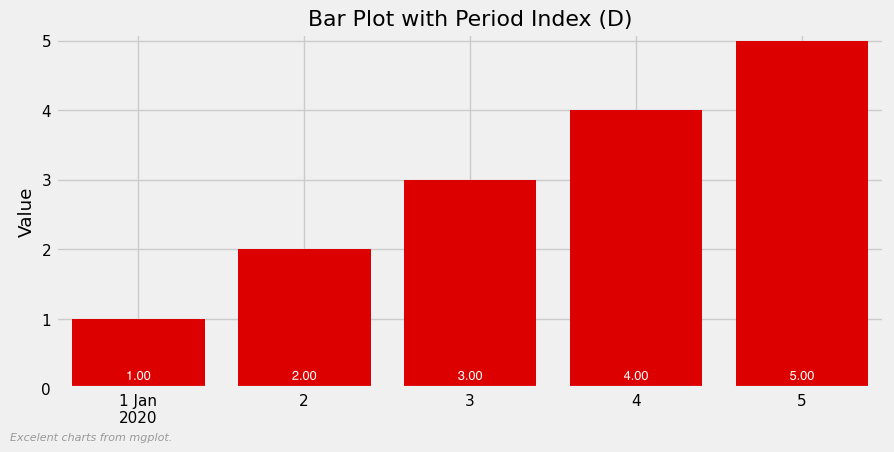

Mismatched type: 'plot_from=Wrong type test' must be of type 'int |
pandas._libs.tslibs.period.Period', in bar_plot().
Unexpected keyword argument 'junk' received by finalise_plot(). Please check
the function call.


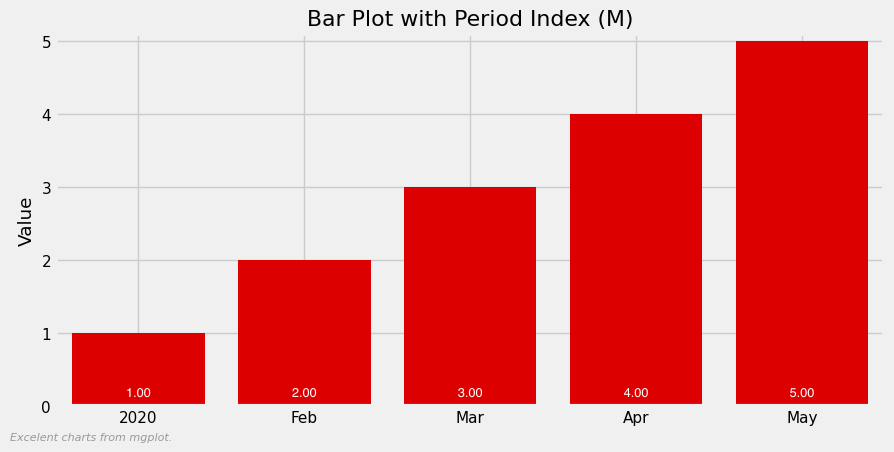

Mismatched type: 'plot_from=Wrong type test' must be of type 'int |
pandas._libs.tslibs.period.Period', in bar_plot().
Unexpected keyword argument 'junk' received by finalise_plot(). Please check
the function call.


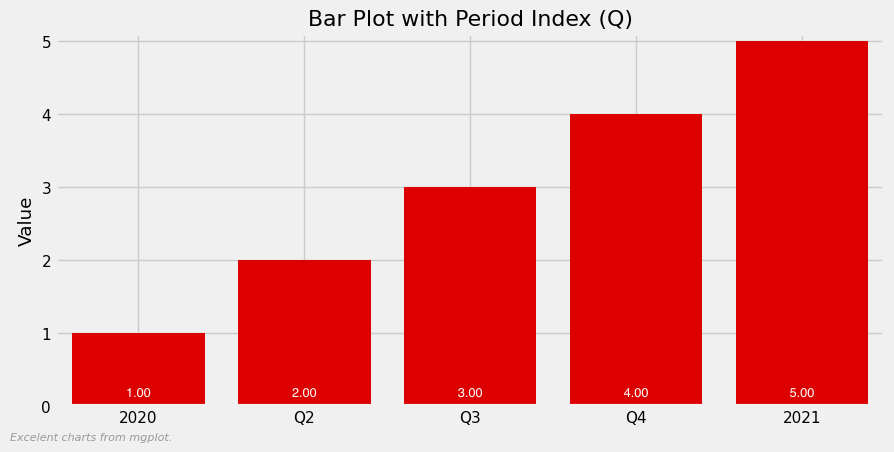

Mismatched type: 'plot_from=Wrong type test' must be of type 'int |
pandas._libs.tslibs.period.Period', in bar_plot().
Unexpected keyword argument 'junk' received by finalise_plot(). Please check
the function call.


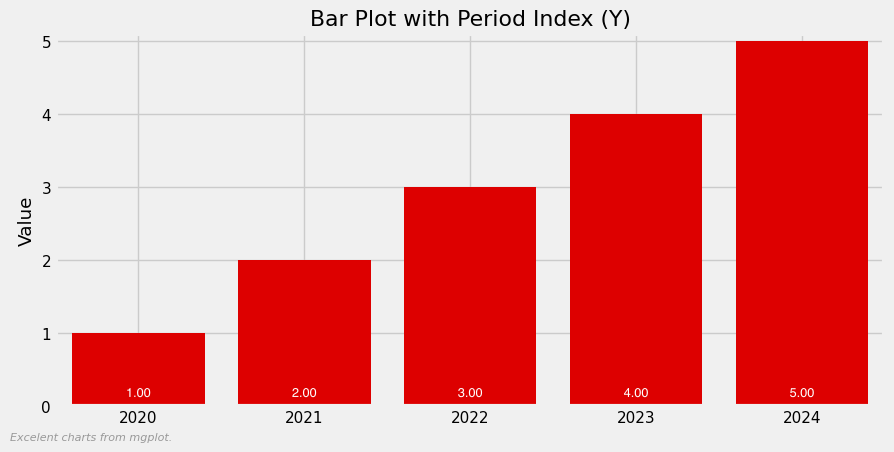

In [11]:
# Expectation:
# - should produce four bar plots, with different period indices (day, month, quarter, year)
# - bars should be annotated with the values2
# - should finalise the plots with a title, y-label, left footer, and show
# - should raise an error due to the wrong type for plot_from argument
# - should raise an error due to the junk argument

series = pd.Series([1, 2, 3, 4, 5])
for period in ["D", "M", "Q", "Y"]:
    series.index = pd.period_range('2020-01-01', periods=5, freq=period)
    ax = mg.bar_plot(series, annotate=True, plot_from="Wrong type test", )
    mg.finalise_plot(
        ax, 
        title=f'Bar Plot with Period Index ({period})', 
        ylabel='Value', 
        lfooter="Excelent charts from mgplot.",
        junk="garbage argument - to test error reporting",
        show=True,
    )

### Run plot

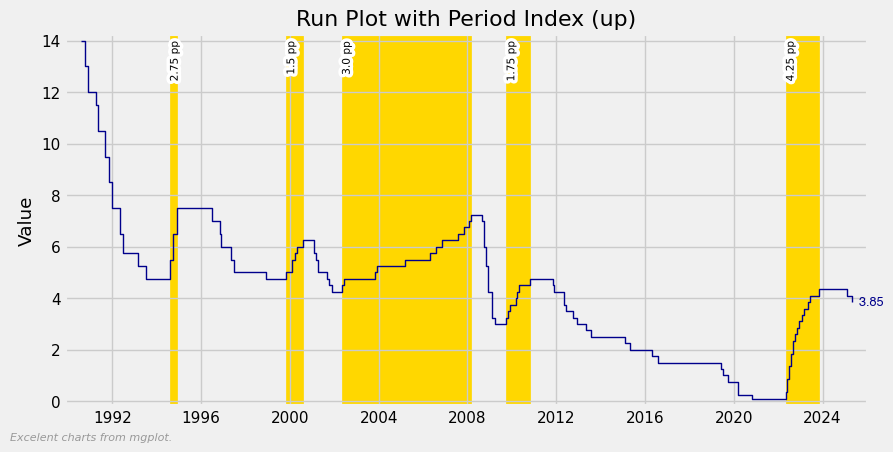

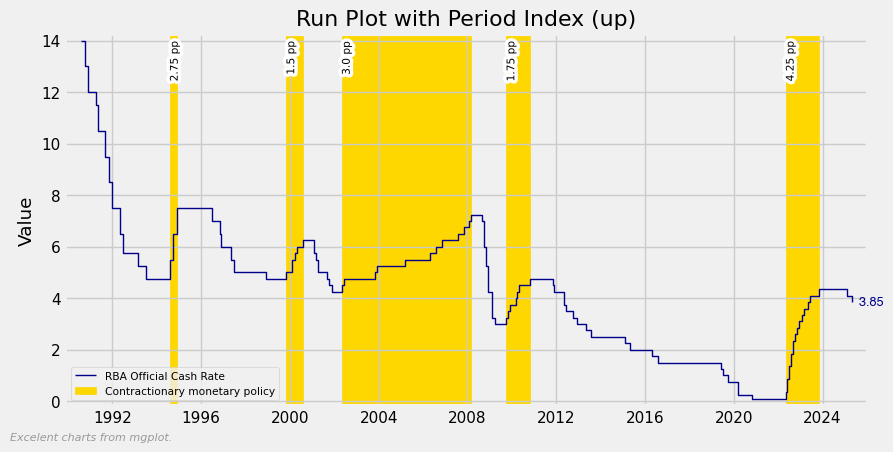

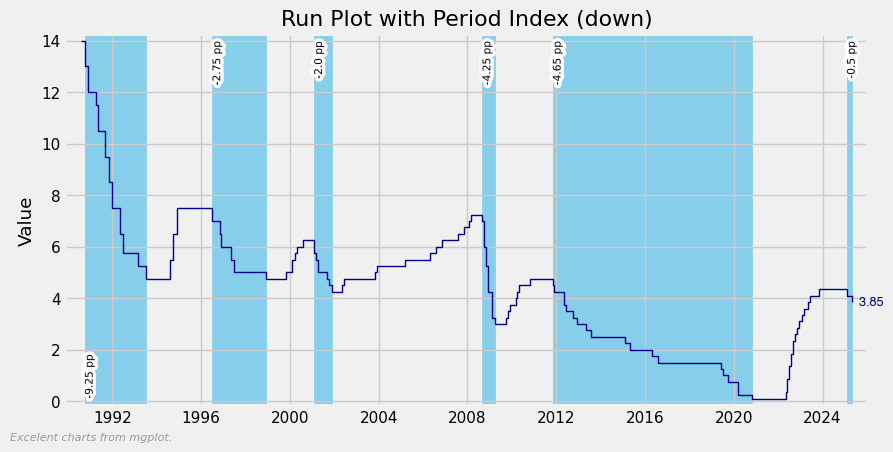

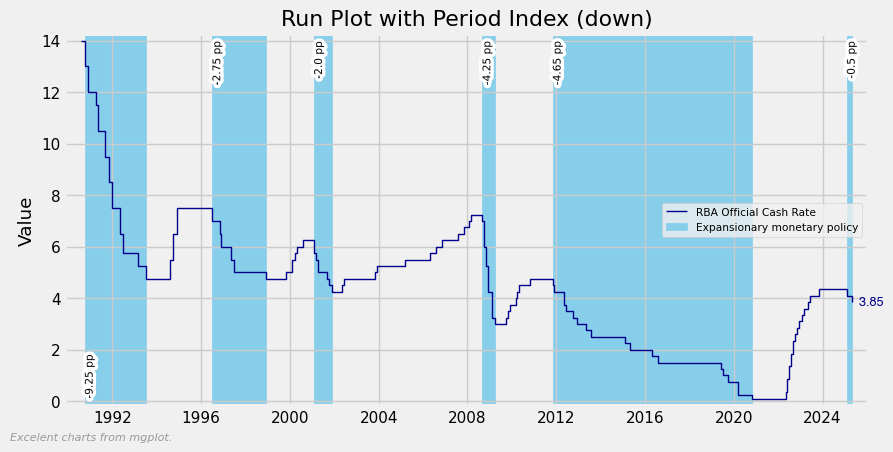

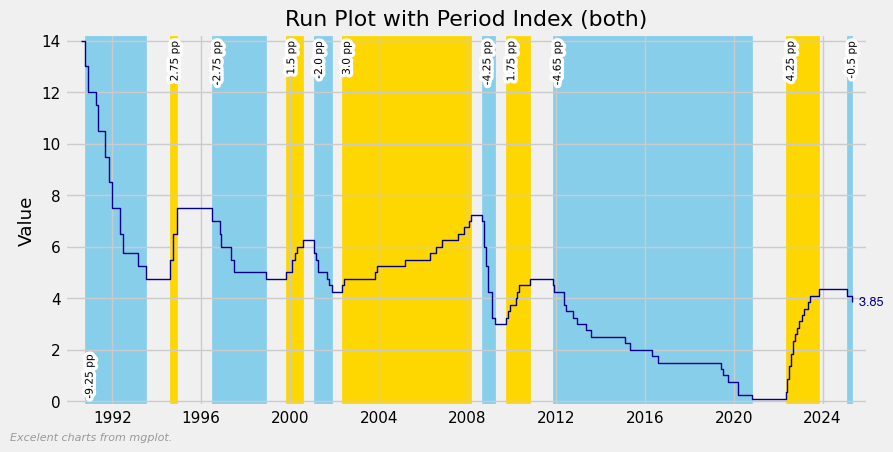

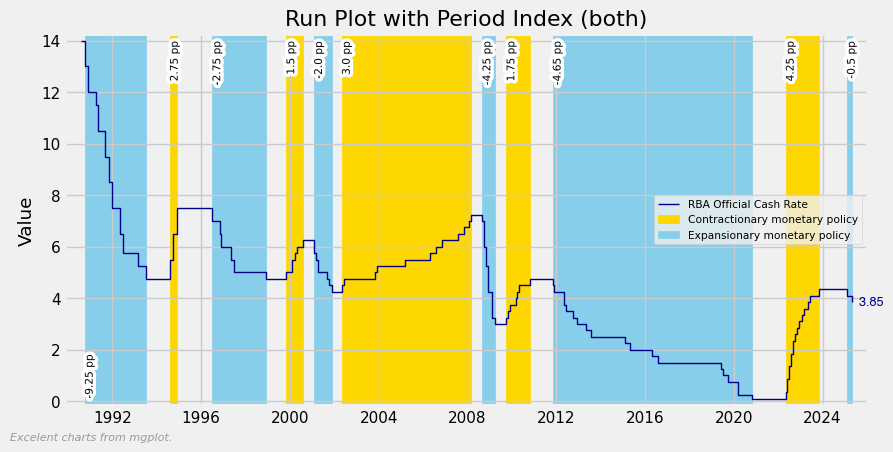

In [12]:
data = pd.read_csv("./zz-test-data/ocr_rba.csv", index_col=0, parse_dates=True)
data.index = data.index.to_period("M")
series = data[data.columns[0]]
labels = {
    "up": "Contractionary monetary policy",
    "down": "Expansionary monetary policy",
    "both": ("Contractionary monetary policy", "Expansionary monetary policy"),
}
for direction in ["up", "down", "both"]:
    mg.run_plot_finalise(
        series, 
        direction=direction, 
        annotate=True,
        title=f"Run Plot with Period Index ({direction})",
        ylabel="Value",
        lfooter="Excelent charts from mgplot.",
        show=True,
    )
    mg.run_plot_finalise(
        series, 
        direction=direction, 
        annotate=True,
        title=f"Run Plot with Period Index ({direction})",
        ylabel="Value",
        lfooter="Excelent charts from mgplot.",
        show=True,
        label_series=True,
        label=labels[direction],
    )


### Revision plot

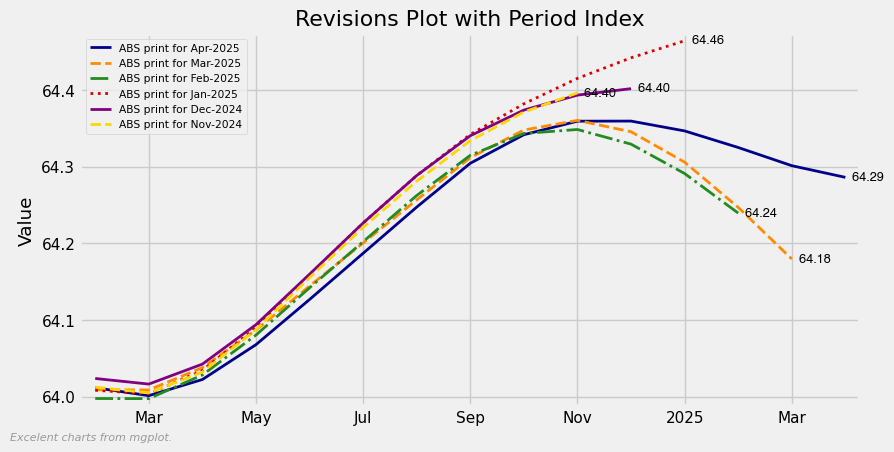

In [13]:
data = pd.read_csv("./zz-test-data/revisions.csv", index_col=0, parse_dates=True)
data.index = data.index.to_period("M")
ax = mg.revision_plot(data, annotate=True, rounding=2)
mg.finalise_plot(
    ax,
    title="Revisions Plot with Period Index",
    ylabel="Value",
    lfooter="Excelent charts from mgplot.",
    legend=True,
    show=True,
)

### Summary plot

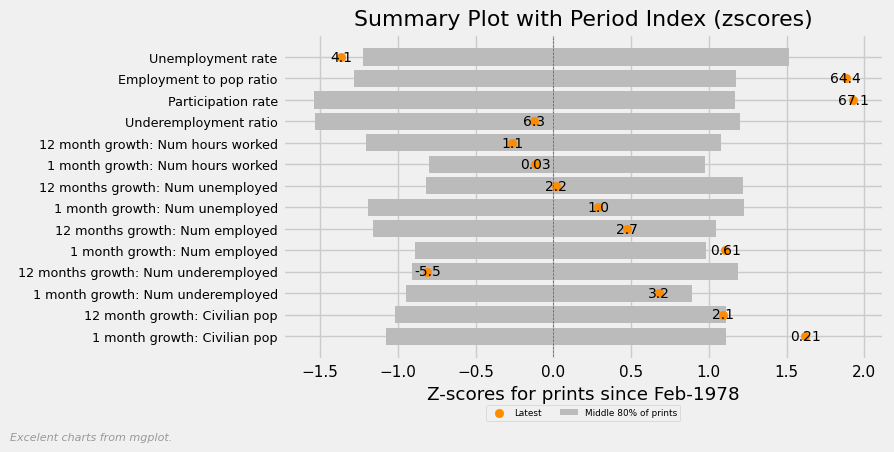

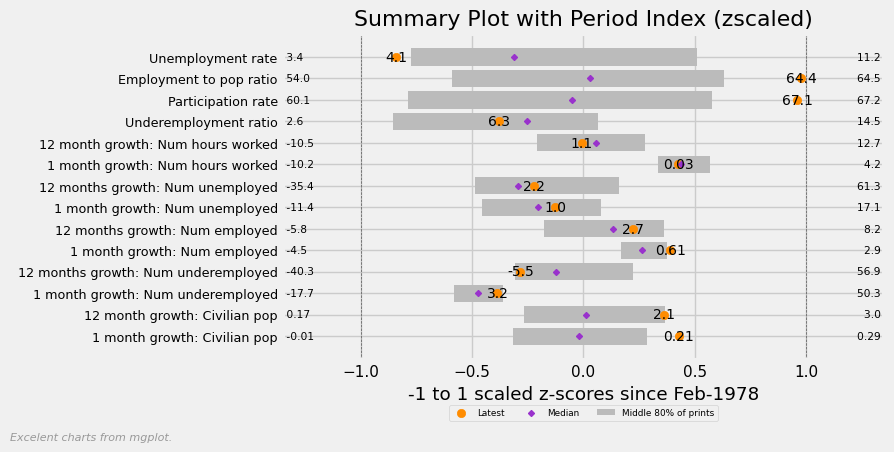

In [14]:
data = pd.read_csv("./zz-test-data/summary.csv", index_col=0, parse_dates=True)
data.index = data.index.to_period("M")
for plot_type in ["zscores", "zscaled"]:
    ax = mg.summary_plot(data, plot_type=plot_type)
    mg.finalise_plot(
        ax,
        title=f"Summary Plot with Period Index ({plot_type})",
        lfooter="Excelent charts from mgplot.",
        preserve_lims=True,
        figsize=(9.0, 4.5),
        show=True,
    )

/var/folders/96/8bhlz_x975z93glbxq_2_yqr0000gn/T/ipykernel_8858/3354277435.py:3: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  data.resample('Q').mean(),  # this should not be depricated in pandas


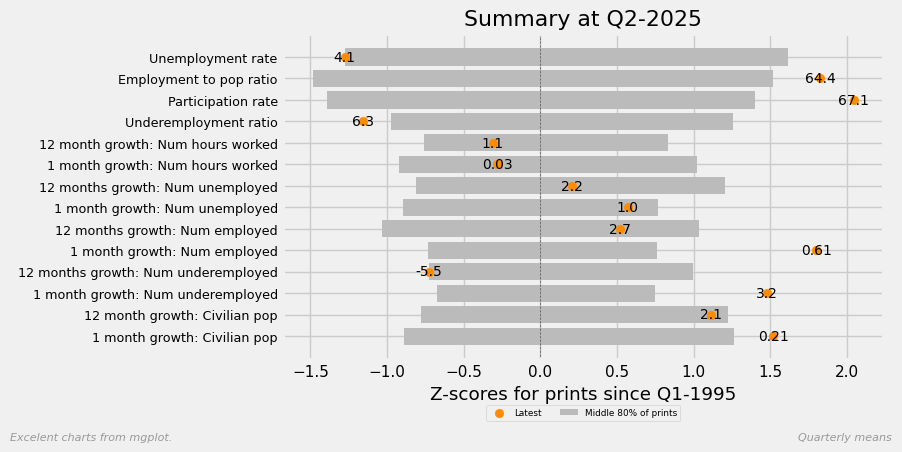

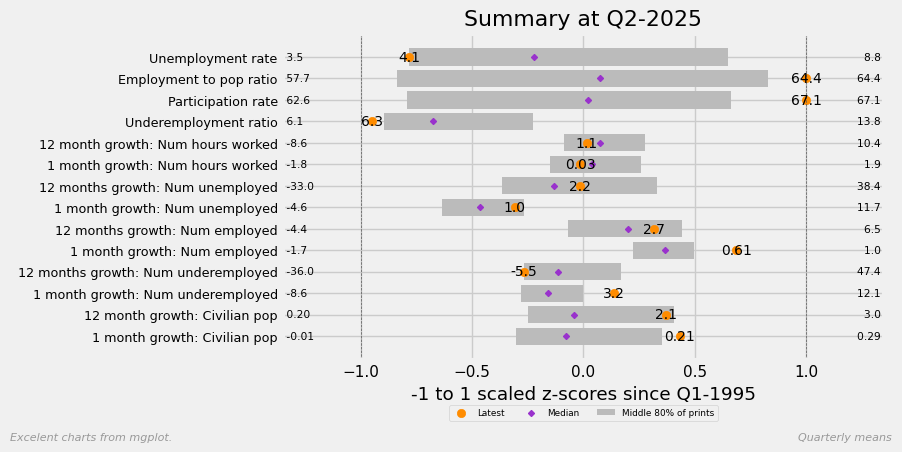

In [15]:
# --- similar to the above, but with quarterly data.
mg.summary_plot_finalise(
    data.resample('Q').mean(),  # this should not be depricated in pandas
    plot_type=plot_type,
    plot_from=pd.Period("01-01-1995", freq="Q"),
    lfooter="Excelent charts from mgplot.",
    rfooter="Quarterly means",
    show=True,
)

### Test a finaliser - postcovid_plot_finalise

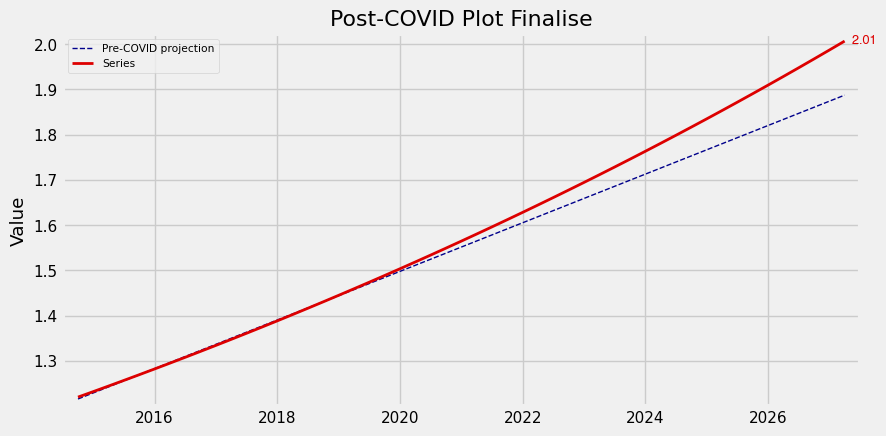

In [16]:
mg.postcovid_plot_finalise(
    test_frame["Series 3"],
    title="Post-COVID Plot Finalise",
    ylabel="Value",
    xlabel=None,
    show=True,
)

### Plot then finalise / multi-start

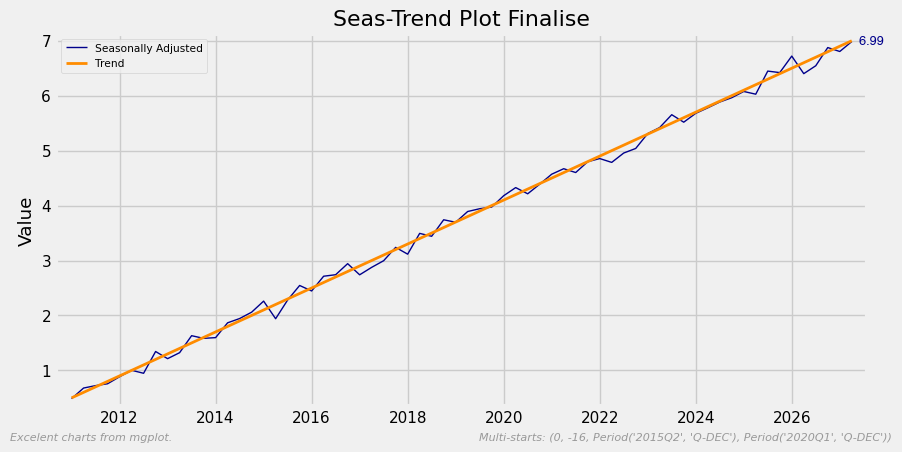

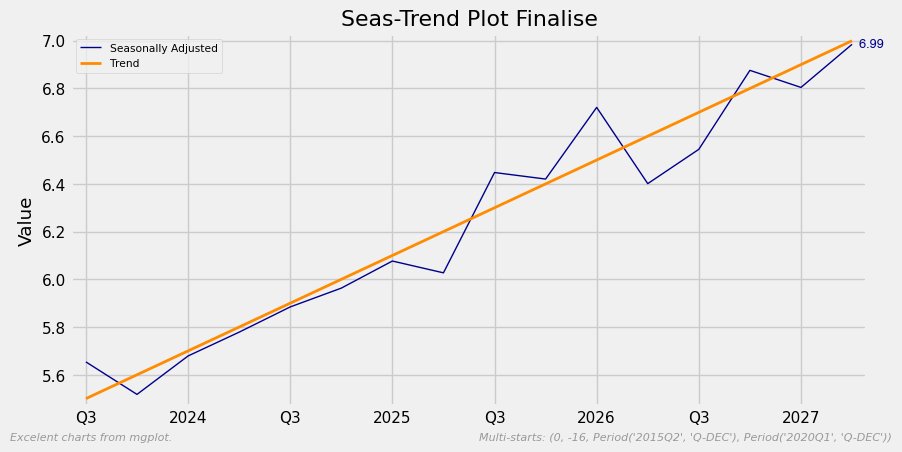

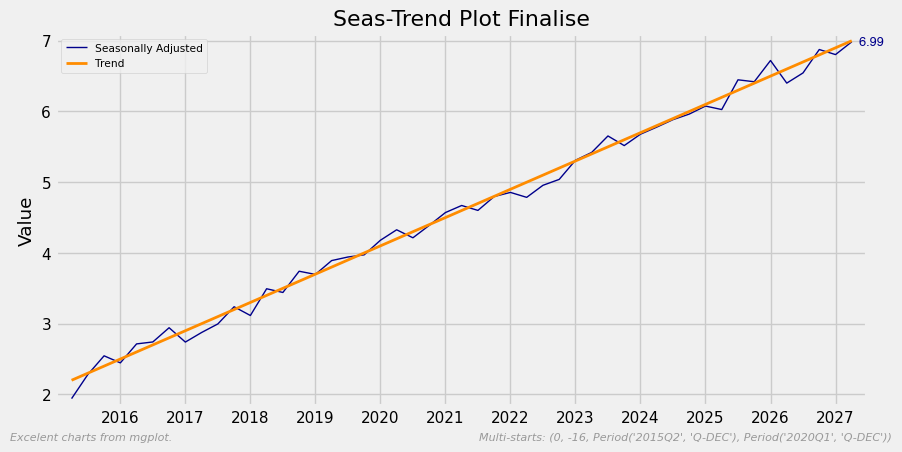

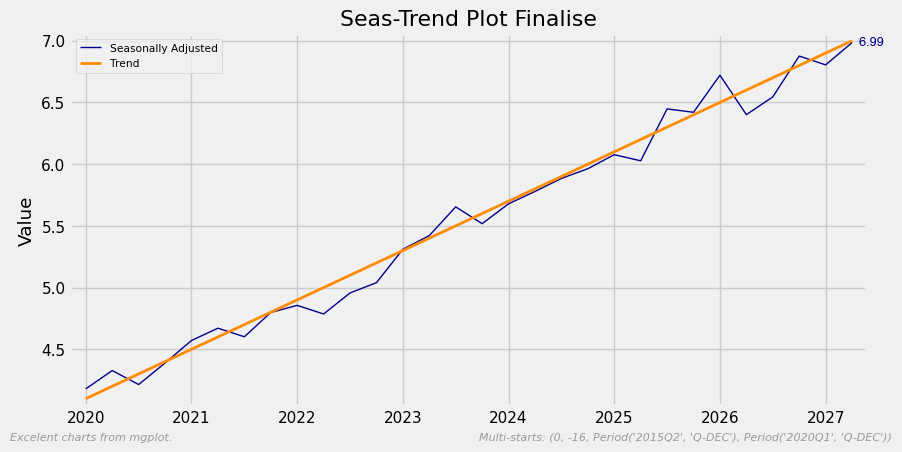

In [17]:
# test different start styles for the seas-trend plot finalise
starters = 0, -16, pd.Period("2015Q2", freq="Q"), pd.Period("2020Q1", freq="Q")
mg.multi_start(
    st,
    function=mg.seastrend_plot_finalise,
    starts=starters,
    title=f"Seas-Trend Plot Finalise",
    ylabel="Value",
    xlabel=None,
    legend=True,
    lfooter="Excelent charts from mgplot.",
    rfooter=f"Multi-starts: {starters}",
    show=True,
)

### Plot-the-finalise / multi-column

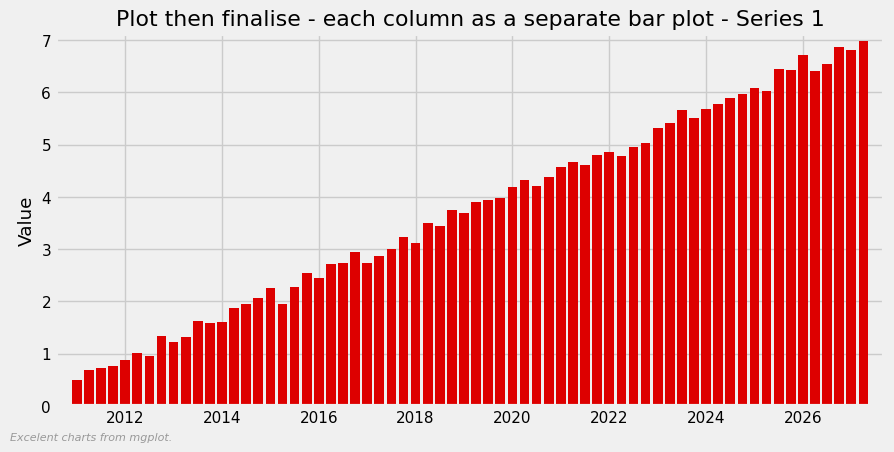

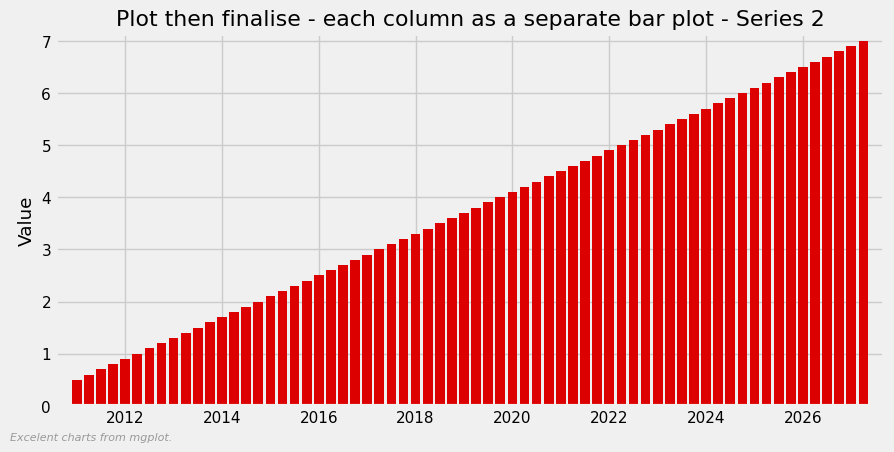

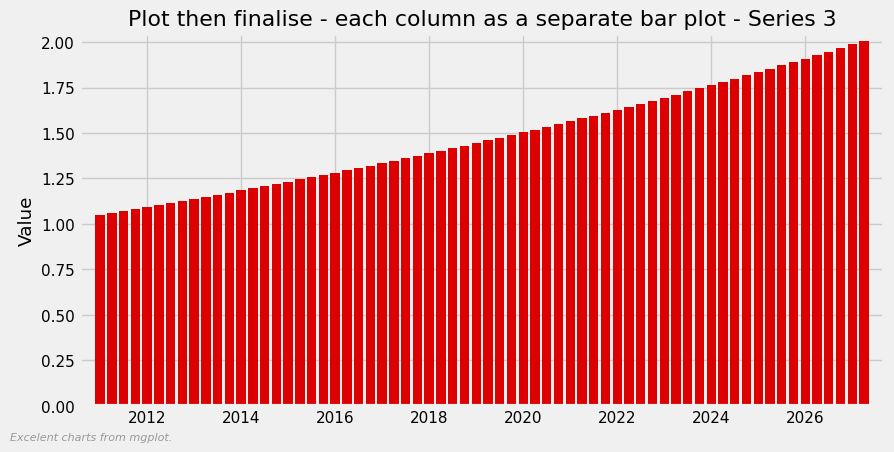

In [18]:
mg.multi_column(
    test_frame,
    function=[mg.plot_then_finalise, mg.bar_plot],
    stacked=True,
    title="Plot then finalise - each column as a separate bar plot - ",
    ylabel="Value",
    lfooter="Excelent charts from mgplot.",
    show=True,
)

### Plot with missing data values

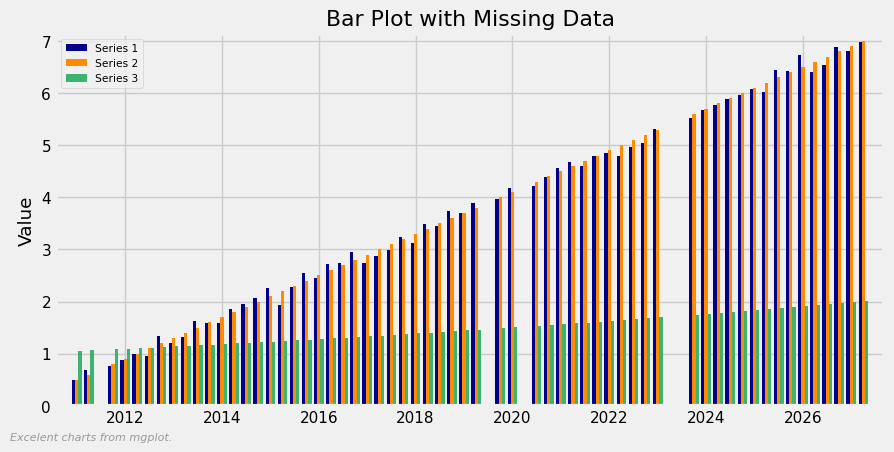

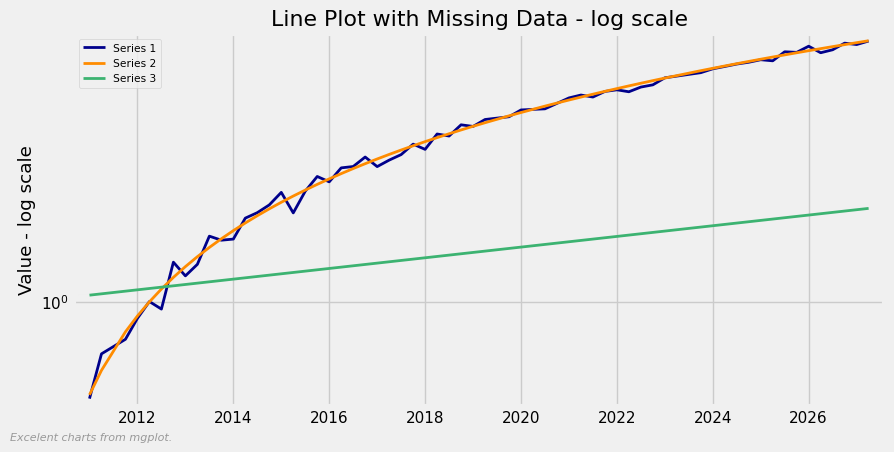

In [19]:
remove_n = 5
drop_indices = random.choice(test_frame.index, remove_n, replace=False)
missing_data = test_frame.drop(drop_indices)
mg.bar_plot_finalise(
    missing_data,
    title="Bar Plot with Missing Data",
    ylabel="Value",
    legend=True,
    lfooter="Excelent charts from mgplot.",
    show=True,
)

# also check a log scale axis
mg.line_plot_finalise(
    missing_data,
    title="Line Plot with Missing Data - log scale",
    ylabel="Value - log scale",
    yscale="log",
    legend=True,
    lfooter="Excelent charts from mgplot.",
    show=True,
)

### Finished

In [20]:
%load_ext watermark
%watermark -u -t -d --iversions --watermark --machine --python --conda

Last updated: 2025-07-16 19:48:51

Python implementation: CPython
Python version       : 3.13.5
IPython version      : 9.4.0

conda environment: n/a

Compiler    : Clang 20.1.4 
OS          : Darwin
Release     : 24.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 14
Architecture: 64bit

mgplot: 0.2.7a3
pandas: 2.3.1
numpy : 2.3.1

Watermark: 2.5.0

